# Simple Neural Network



In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


## DataSet

In [7]:
X,Y = load_coffee_data(); #create coffee roasting data
print(X.shape, Y.shape)

(200, 2) (200, 1)


plot the coffee roasting data below.

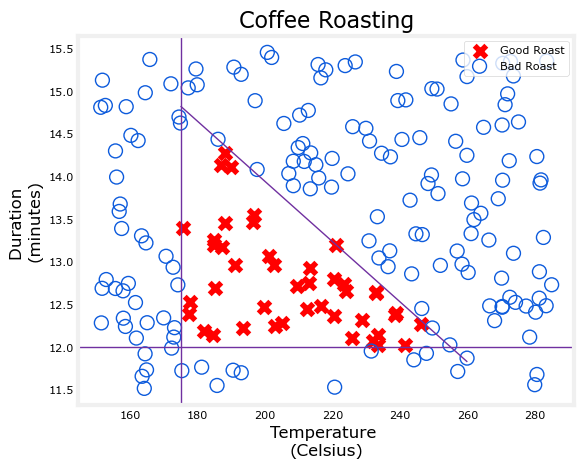

In [8]:
plt_roast(X,Y)

### Normalize Data
The procedure below uses a Keras [normalization layer](https://keras.io/api/layers/preprocessing_layers/numerical/normalization/)

In [9]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


copy our data to increase the training set size and reduce the number of training epochs.

In [10]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape)   

(200000, 2) (200000, 1)


## Tensorflow Model

### Model
There are two layers with sigmoid activations as shown below:

In [11]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [13]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


In [14]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.94 -1.03 -0.88]
 [-0.27 -1.05 -0.62]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.8 ]
 [-1.11]
 [-1.06]] 
b2(1,): [0.]


In [15]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 6s 935us/step - loss: 0.1446
Epoch 2/10
6250/6250 [==============================] - 6s 1ms/step - loss: 0.0250
Epoch 3/10
6250/6250 [==============================] - 6s 961us/step - loss: 0.0136
Epoch 4/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0090
Epoch 5/10
6250/6250 [==============================] - 6s 1ms/step - loss: 0.0062
Epoch 6/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0044
Epoch 7/10
6250/6250 [==============================] - 6s 1ms/step - loss: 0.0032
Epoch 8/10
6250/6250 [==============================] - 6s 918us/step - loss: 0.0023
Epoch 9/10
6250/6250 [==============================] - 6s 983us/step - loss: 0.0017
Epoch 10/10
6250/6250 [==============================] - 6s 888us/step - loss: 0.0013


#### Updated Weights
After fitting, the weights have been updated: 

In [16]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 14.06  -0.16 -11.58]
 [ 11.66  -9.37  -0.29]] 
b1: [  1.81 -11.66 -12.6 ]
W2:
 [[-47.08]
 [-50.17]
 [-55.6 ]] 
b2: [29.49]


### Predictions
 To make a decision, one must apply the probability to a threshold. In this case, we will use 0.5

In [19]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 19ms/step
predictions = 
 [[9.92e-01]
 [2.27e-08]]


In [16]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


### results


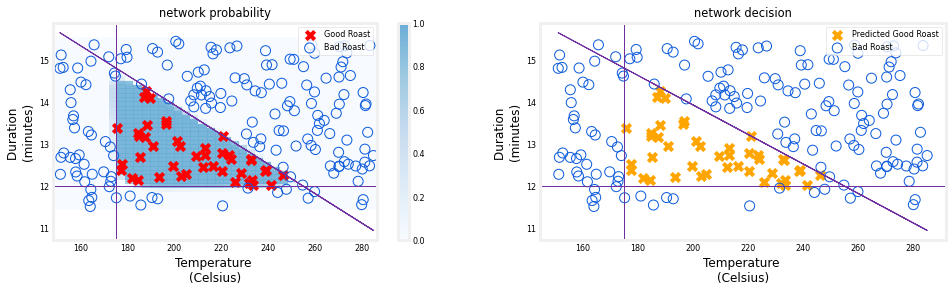

In [20]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)